## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns 
from scipy import stats
from scipy.stats import norm
#so we dont have to write .plot()
%matplotlib inline 
sns.set_style("whitegrid") #possible choices: white, dark, whitegrid, darkgrid, ticks

In [2]:
train = pd.read_csv('data/train_seaborn.csv', sep=',')
test = pd.read_csv('data/test_seaborn.csv', sep=',')

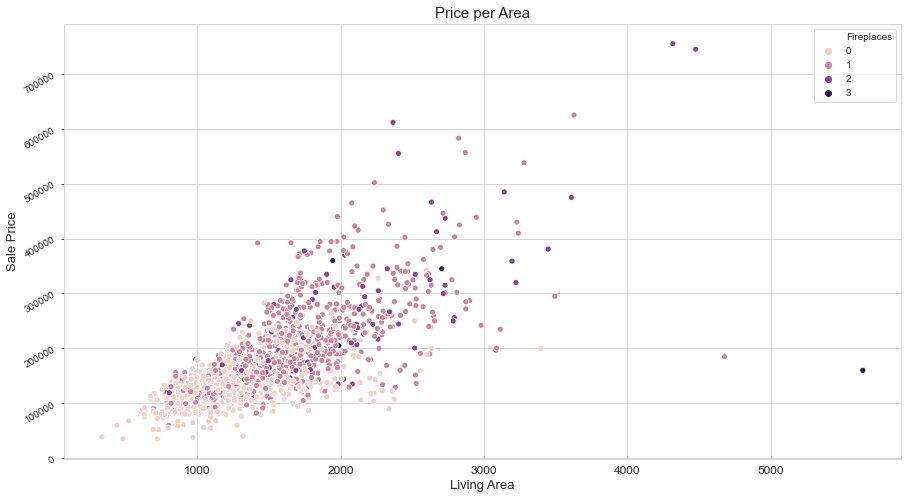

In [3]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(train['GrLivArea'], train['SalePrice'], hue=train['Fireplaces'])

ax.set_title('Price per Area', fontsize = 15, loc='center')
ax.set_ylabel('Sale Price', fontsize = 13)
ax.set_xlabel('Living Area', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=10)
ax.yaxis.tick_left() # where the y axis marks will be
plt.yticks(rotation=30)

ax.legend(loc='upper right') #if multiple figures, they have to contain label=''

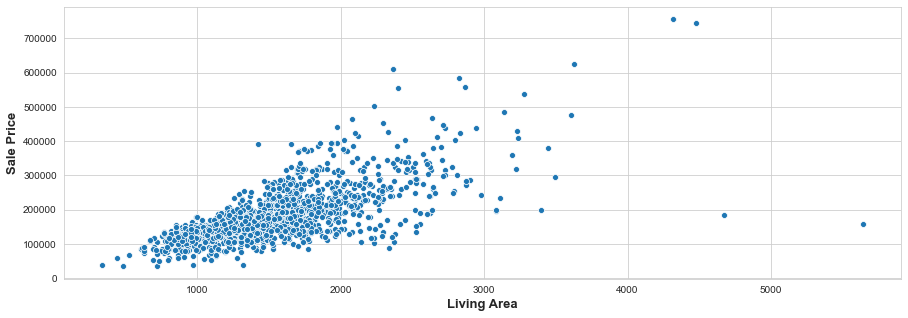

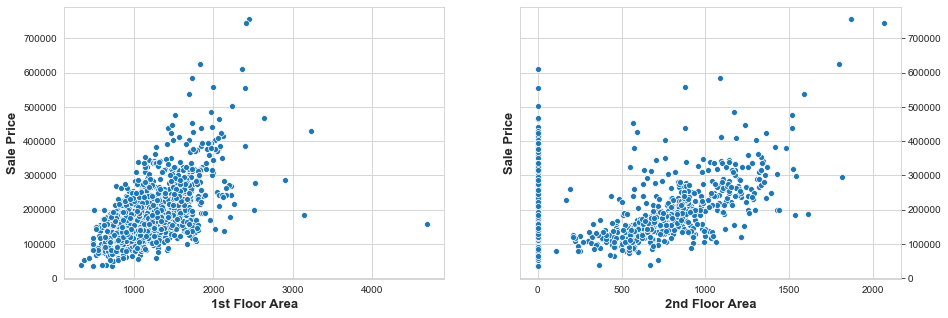

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(train['GrLivArea'], train['SalePrice'])
ax.set_xlabel('Living Area', fontsize = 13, fontdict=dict(weight='bold'))
ax.set_ylabel('Sale Price', fontsize = 13, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(train['1stFlrSF'], train['SalePrice'], ax=ax[0])
sns.scatterplot(train['2ndFlrSF'], train['SalePrice'], ax=ax[1])
ax[0].set_xlabel('1st Floor Area', fontsize = 13, fontdict=dict(weight='bold')); ax[0].set_ylabel('Sale Price', fontsize = 13, fontdict=dict(weight='bold'))
ax[1].set_xlabel('2nd Floor Area', fontsize = 13, fontdict=dict(weight='bold')); ax[1].set_ylabel('Sale Price', fontsize = 13, fontdict=dict(weight='bold'))
ax[1].yaxis.tick_right() # where the y axis marks will be

### <a id='univariate'>Univariate Analysis</a>

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable. Since it's a single variable it doesn’t deal with causes or relationships.  The main purpose of univariate analysis is to describe the data and find patterns that exist within it

#### <a id='histogram'>Histogram</a>
Flexibly plot a univariate distribution of observations.
https://seaborn.pydata.org/generated/seaborn.distplot.html

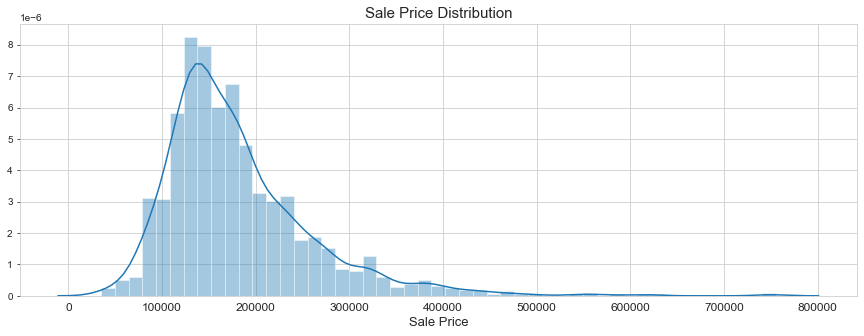

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.distplot(train['SalePrice'])

ax.set_title('Sale Price Distribution', fontsize = 15, loc='center')
ax.set_xlabel('Sale Price', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

We see that the SalePrice:
- Deviate from the normal distribution.
- Have appreciable positive **skewness**. 
- Show peakedness.

#### <a id='skewness'>Skewness</a>

It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0. 

- **Positive Skewness** means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. 

- **Negative Skewness** is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

![skewness](https://cdn-images-1.medium.com/max/800/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

The rule of thumb seems to be:

- If the skewness is between **-0.5 and 0.5**, the data are **fairly symmetrical**.
- If the skewness is between **-1 and -0.5**(negatively skewed) or between **0.5 and 1**(positively skewed), the data are **moderately skewed**.
- If the skewness is less than **-1**(negatively skewed) or greater than **1**(positively skewed), the data are **highly skewed**.

In case of **positive skewness**, **log transformations** usually works well. The probability plot is a graphical technique for assessing whether or not a data set follows a given distribution such as the normal.

#### <a id='kurtosis'>Kurtosis</a>

It is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the **extreme values** in one versus the other tail. It is actually the measure of **outliers** present in the distribution.

- **High kurtosis** in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things.
- **Low kurtosis** in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.

![kurtosis](https://cdn-images-1.medium.com/max/1600/1*Nqu07THa7APRTOF7kaVr5Q.jpeg)

- **Mesokurtic**: This distribution has kurtosis statistic similar to that of the **normal distribution**. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard **normal distribution has a kurtosis of three**.
- **Leptokurtic (Kurtosis > 3)**: Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of **outliers**. Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
- **Platykurtic: (Kurtosis < 3)**: Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers. The reason for this is because the extreme values are less than that of the normal distribution.

In [6]:
print("Skewness: {:.3f}".format(train['SalePrice'].skew()))
print("Kurtosis: {:.3f}". format(train['SalePrice'].kurt()))

Skewness: 1.883
Kurtosis: 6.536


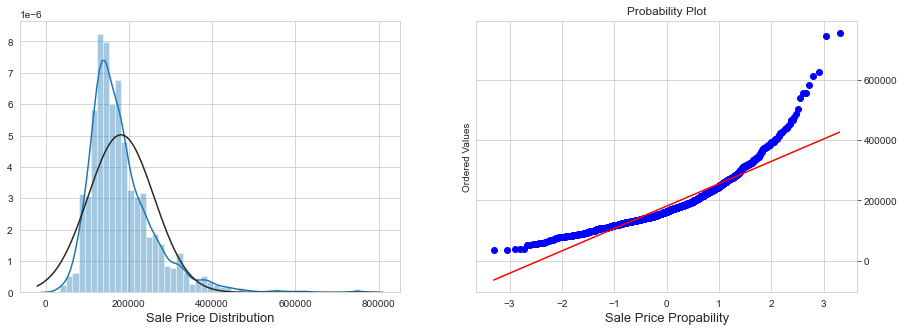

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(train['SalePrice'], fit=norm, ax=ax[0])
stats.probplot(train['SalePrice'], plot=plt)
ax[0].set_xlabel('Sale Price Distribution', fontsize = 13)
ax[1].set_xlabel('Sale Price Propability', fontsize = 13)
ax[1].yaxis.tick_right() # where the y axis marks will be

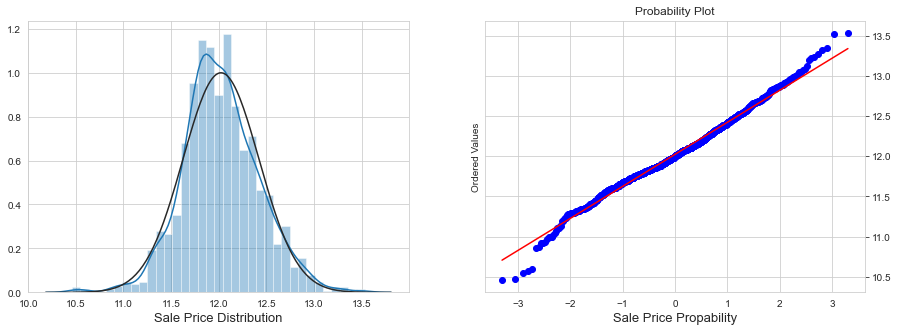

In [8]:
train['SalePrice'] = np.log(train['SalePrice'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(train['SalePrice'], fit=norm, ax=ax[0])
stats.probplot(train['SalePrice'], plot=plt)
ax[0].set_xlabel('Sale Price Distribution', fontsize = 13)
ax[1].set_xlabel('Sale Price Propability', fontsize = 13)
ax[1].yaxis.tick_right() # where the y axis marks will be

In [9]:
#Let's load again the dataset
train = pd.read_csv('data/train_seaborn.csv', sep=',')

#### <a id='kde'>KDE Plot</a>
Fit and plot a univariate or bivariate kernel density estimate. https://seaborn.pydata.org/generated/seaborn.kdeplot.html

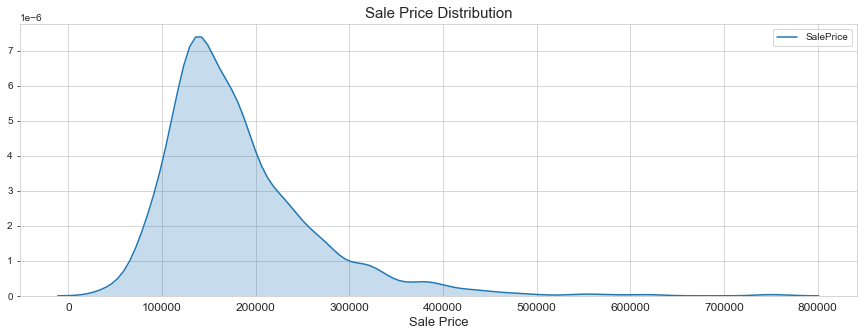

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(train['SalePrice'], shade=True)

ax.set_title('Sale Price Distribution', fontsize = 15, loc='center')
ax.set_xlabel('Sale Price', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='box'>Box Plot</a>
Draw a box plot to show distributions with respect to categories. https://seaborn.pydata.org/generated/seaborn.boxplot.html

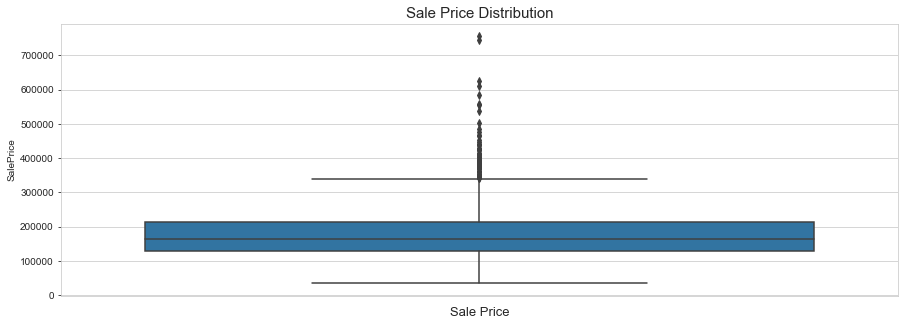

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(train['SalePrice'], orient = 'v')

ax.set_title('Sale Price Distribution', fontsize = 15, loc='center')
ax.set_xlabel('Sale Price', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='count'>Count Plot</a>

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

https://seaborn.pydata.org/generated/seaborn.countplot.html

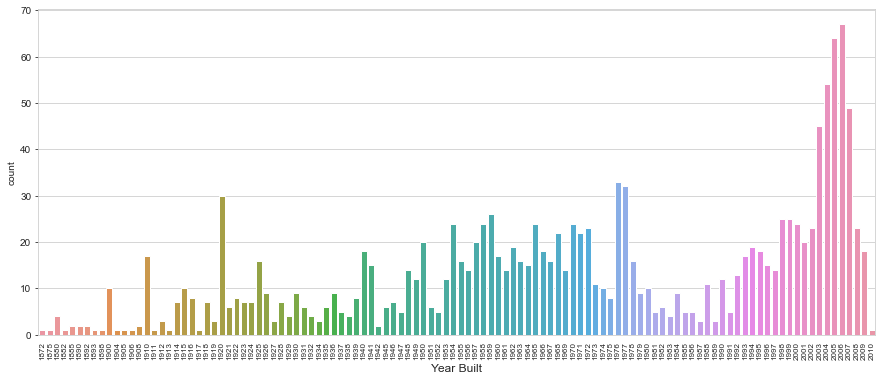

In [12]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(train['YearBuilt'])

plt.xticks(rotation=90)
ax.set_xlabel('Year Built', fontsize = 12)
plt.tick_params(axis='x', which='major', labelsize=8)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='pie'>Pie Chart</a>

Text(0, 0.5, 'Garage Cars')

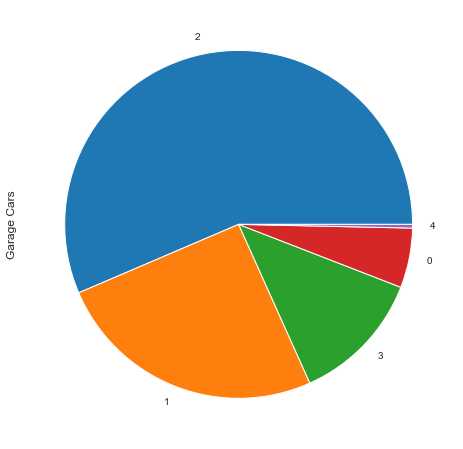

In [13]:
f,ax=plt.subplots(figsize=(8,8))
train['GarageCars'].value_counts().plot(kind='pie')

ax.set_ylabel('Garage Cars', fontsize = 12)

### <a id='bivariate'>Bivariate Analysis</a>

Bivariate analysis is used to find out if there is a relationship between two different variables.

### Continious

#### <a id='scatter'>Scatter Plot</a>
Draw a scatter plot with possibility of several semantic groupings. https://seaborn.pydata.org/generated/seaborn.scatterplot.html

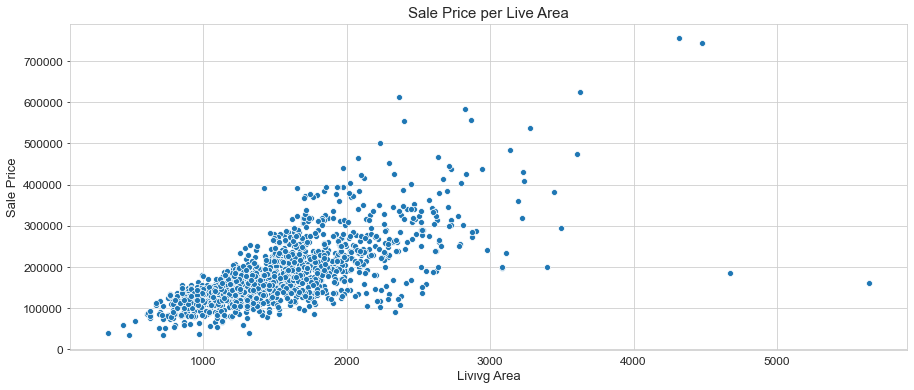

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(train['GrLivArea'], train['SalePrice'])

ax.set_title('Sale Price per Live Area', fontsize = 15, loc='center')
ax.set_xlabel('Livινg Area', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='join'>Join Plot (scatter)</a>
Draw a plot of two variables with bivariate and univariate graphs. https://seaborn.pydata.org/generated/seaborn.jointplot.html

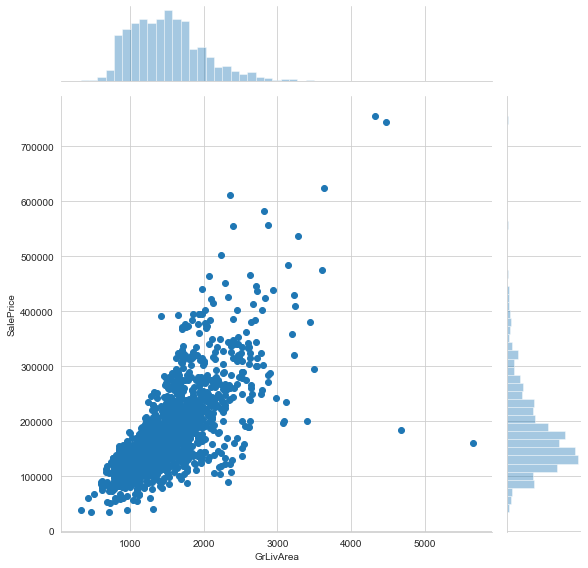

In [15]:
sns.jointplot(train['GrLivArea'], train['SalePrice'], height=8, kind='scatter')

#### <a id='reg'>Join Plot (reg) or lm Plot</a>

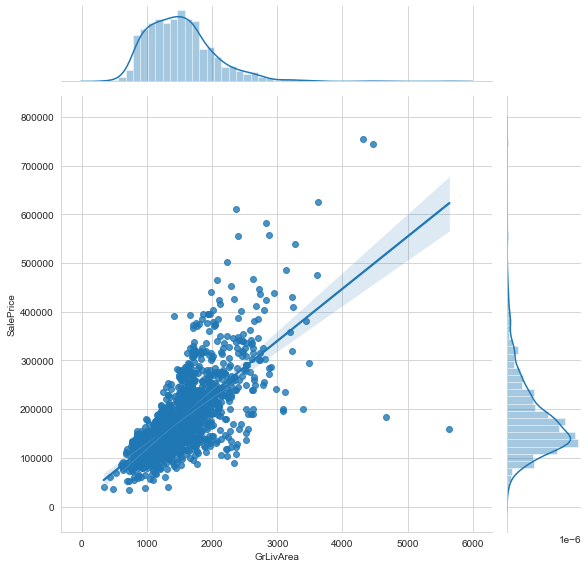

In [16]:
#alternative: sns.lmplot(x='GrLivArea', y='SalePrice', data=train)
sns.jointplot(train['GrLivArea'], train['SalePrice'], height=8, kind='reg')

#### <a id='kdeplot'>Join Plot (kde) or kde Plot</a>

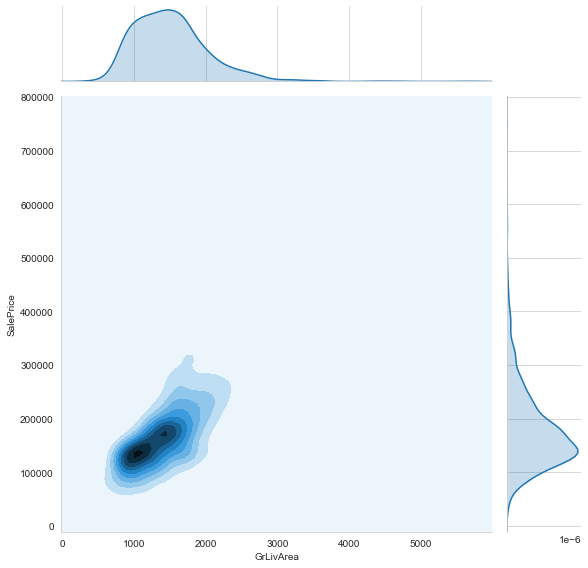

In [17]:
#alternative: sns.kdeplot(train['GrLivArea'], train['SalePrice'], shade=True)
sns.jointplot(train['GrLivArea'], train['SalePrice'], height=8, kind='kde')

#### <a id='hex'>Join Plot (hex)</a>

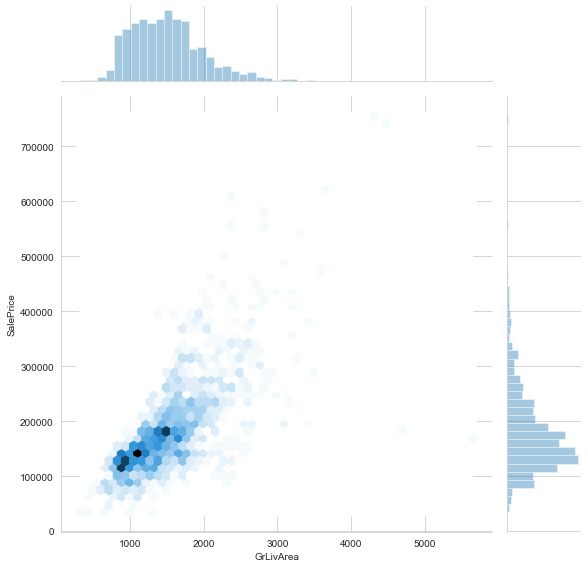

In [18]:
sns.jointplot(train['GrLivArea'], train['SalePrice'], height=8, kind='hex')

#### <a id='line'>Line Plot (alternatives: pointplot, relplot)</a>

Draw a line plot with possibility of several semantic groupings.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

https://seaborn.pydata.org/generated/seaborn.lineplot.html

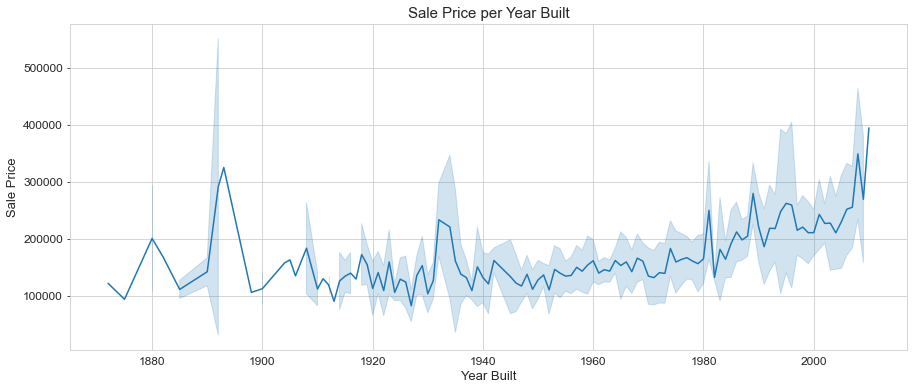

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(train['YearBuilt'], train['SalePrice'], sort=True, ci='sd' ) #'sd' shows the std. Use sort=False if you have already sorted the data

ax.set_title('Sale Price per Year Built', fontsize = 15, loc='center')
ax.set_xlabel('Year Built', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

### Categorical

#### <a id='bar'>Bar Plot</a>

Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

https://seaborn.pydata.org/generated/seaborn.barplot.html

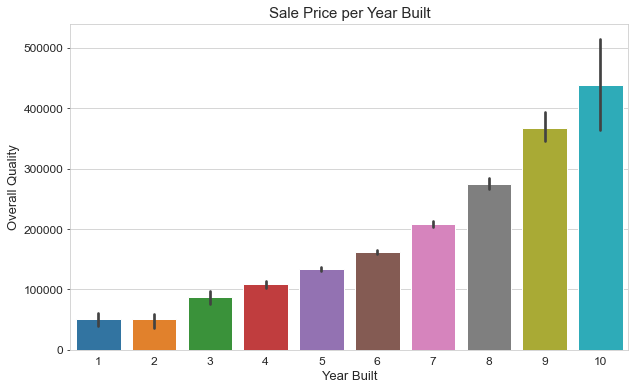

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(train['OverallQual'], train['SalePrice'])

ax.set_title('Sale Price per Year Built', fontsize = 15, loc='center')
ax.set_xlabel('Year Built', fontsize = 13)
ax.set_ylabel('Overall Quality', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='boxplot'>Boxplot</a>
https://seaborn.pydata.org/generated/seaborn.boxplot.html

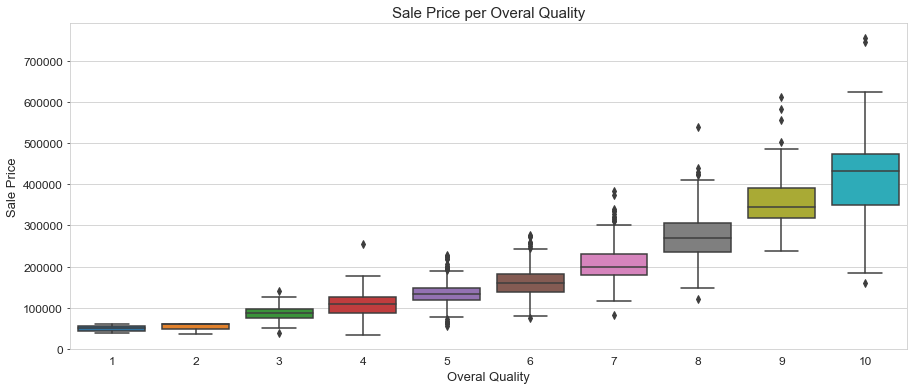

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(train['OverallQual'], train['SalePrice'])

ax.set_title('Sale Price per Overal Quality', fontsize = 15, loc='center')
ax.set_xlabel('Overal Quality', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='violin'>Violin Plot</a>
Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

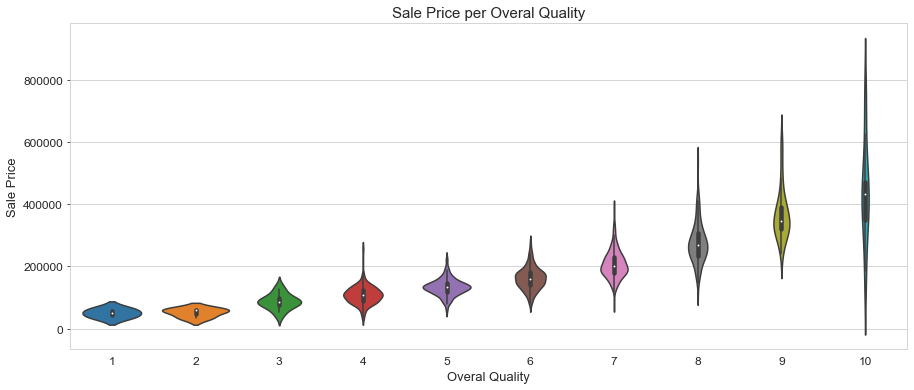

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.violinplot(train['OverallQual'], train['SalePrice'])

ax.set_title('Sale Price per Overal Quality', fontsize = 15, loc='center')
ax.set_xlabel('Overal Quality', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='boxen'>Boxen Plot</a>

Draw an enhanced box plot for larger datasets.

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot

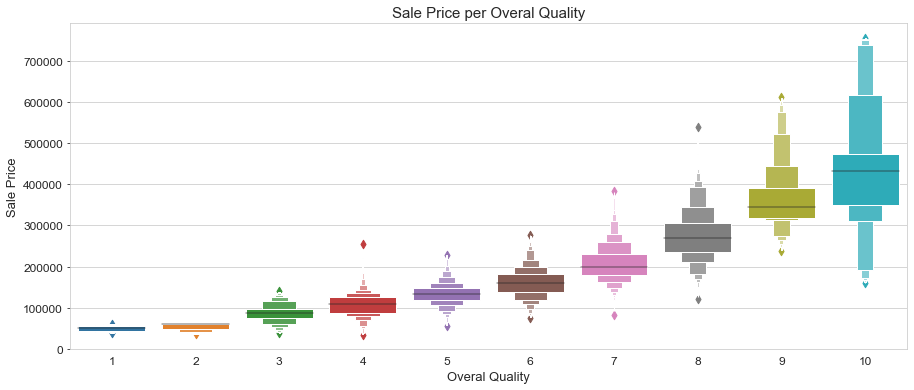

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxenplot(train['OverallQual'], train['SalePrice'])

ax.set_title('Sale Price per Overal Quality', fontsize = 15, loc='center')
ax.set_xlabel('Overal Quality', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='strip'>Strip Plot on Box Plot</a>
A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

https://seaborn.pydata.org/generated/seaborn.stripplot.html

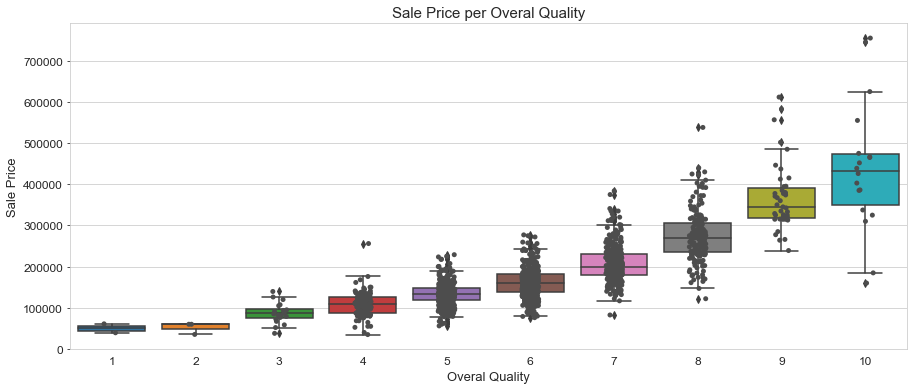

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(train['OverallQual'], train['SalePrice']) #or violinplot
sns.stripplot(train['OverallQual'], train['SalePrice'], color=".3")

ax.set_title('Sale Price per Overal Quality', fontsize = 15, loc='center')
ax.set_xlabel('Overal Quality', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

### <a id='multivariate'>Multivariate Analysis</a>

#### <a id='correlation'>Correlation Heatmap</a>

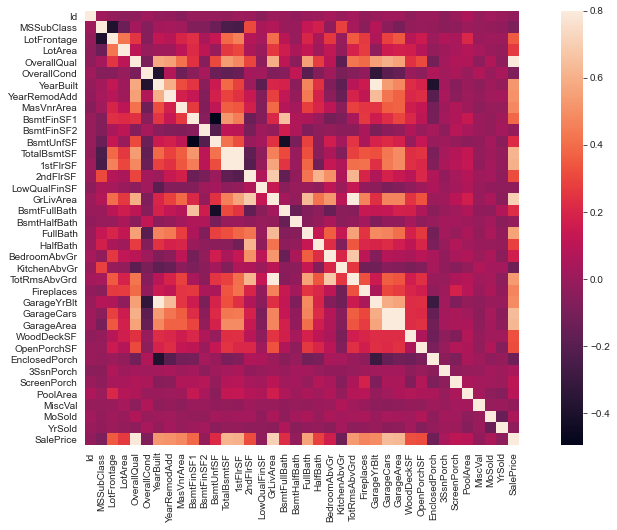

In [25]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corrmat, vmax=.8, square=True);

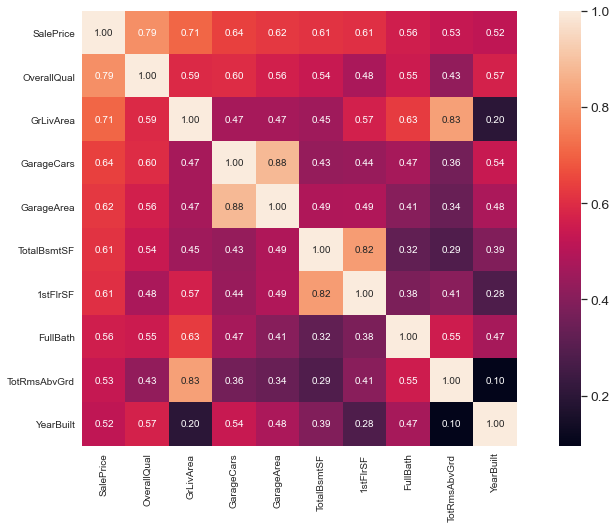

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

#### <a id='pairplot'>Pairplot</a>

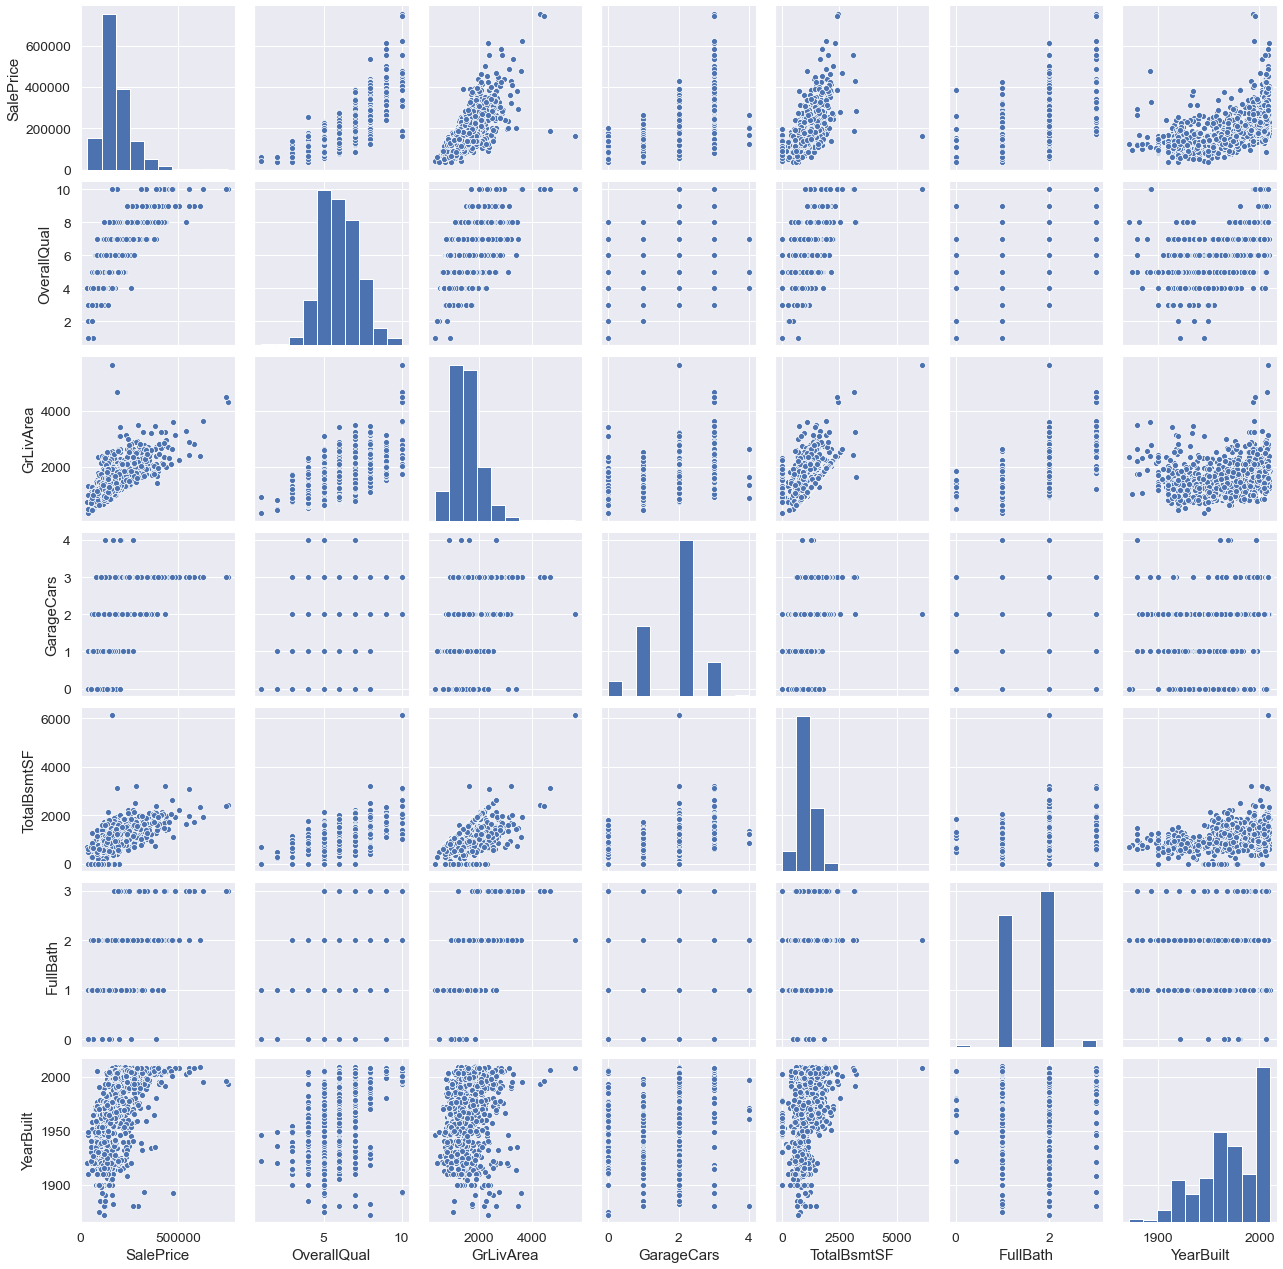

In [27]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)

#### <a id='scatter3'>3 Variables with Scatter Plot</a>

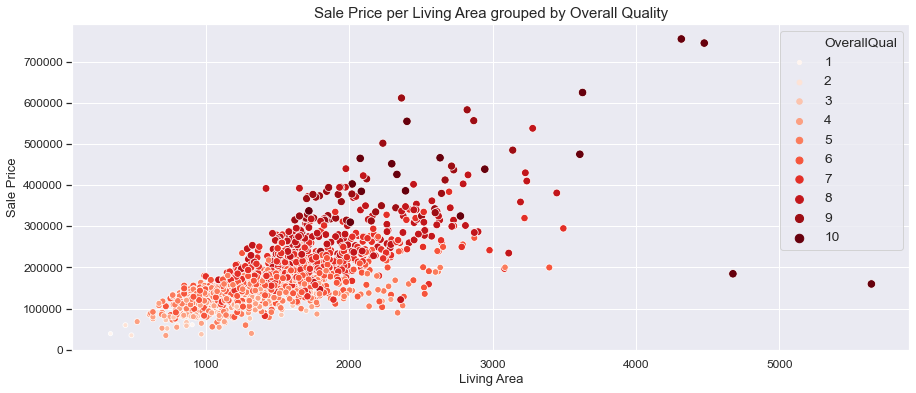

In [28]:
fig, ax = plt.subplots(figsize=(15,6))

sns.scatterplot(train['GrLivArea'], train['SalePrice'], hue=train['OverallQual'], palette='Reds', size=train['OverallQual'],
               legend="full")

ax.set_title('Sale Price per Living Area grouped by Overall Quality', fontsize = 15, loc='center')
ax.set_xlabel('Living Area', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='scatter4'>4 Variables with Scatter Plot</a>

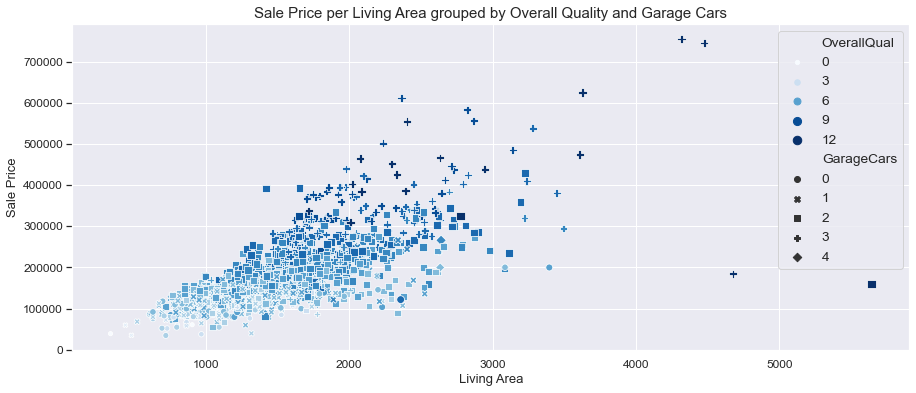

In [29]:
fig, ax = plt.subplots(figsize=(15,6))

sns.scatterplot(train['GrLivArea'], train['SalePrice'], hue=train['OverallQual'], palette='Blues', style=train['GarageCars'],
               size=train['OverallQual'])

ax.set_title('Sale Price per Living Area grouped by Overall Quality and Garage Cars', fontsize = 15, loc='center')
ax.set_xlabel('Living Area', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='line3'>3 Variables with Line Plot</a>

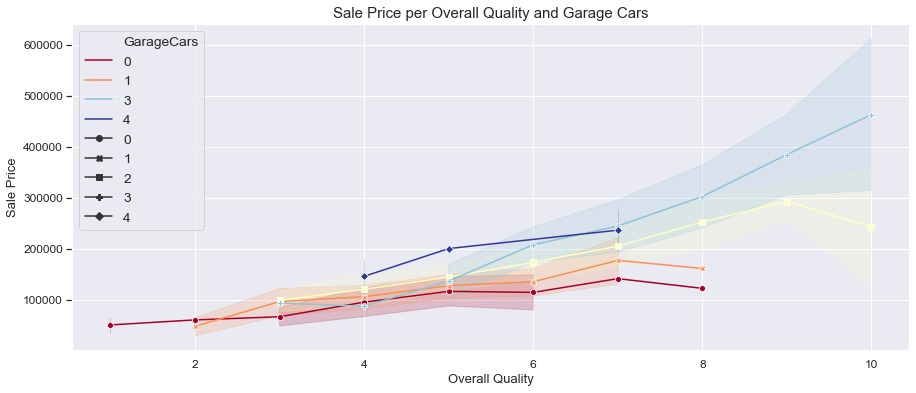

In [30]:
fig, ax = plt.subplots(figsize=(15,6))

sns.lineplot(train['OverallQual'], train['SalePrice'], ci='sd' ,hue=train['GarageCars'], palette='RdYlBu',
            style=train['GarageCars'], markers=True, dashes=False)

ax.set_title('Sale Price per Overall Quality and Garage Cars', fontsize = 15, loc='center')
ax.set_xlabel('Overall Quality', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be

#### <a id='bar3'>3 Variables with Bar Plot</a>

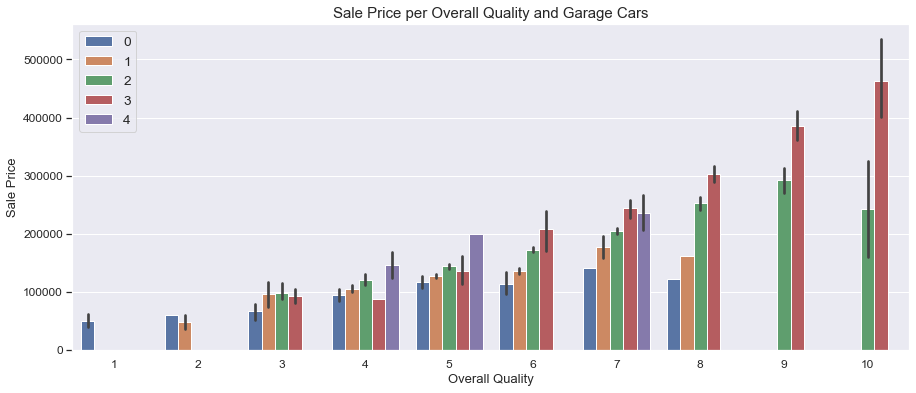

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(train['OverallQual'], train['SalePrice'], hue=train['GarageCars'])
ax.legend(loc='upper left')

ax.set_title('Sale Price per Overall Quality and Garage Cars', fontsize = 15, loc='center')
ax.set_xlabel('Overall Quality', fontsize = 13)
ax.set_ylabel('Sale Price', fontsize = 13)
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left() # where the y axis marks will be